<a href="https://colab.research.google.com/github/manognadeva/Prediction-of-Diabetes-Conditions/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading and Initial Inspection of the Dataset**

In [ ]:
!nvidia-smi

Wed Apr 10 00:04:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Importing necessary libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

**Loading the Dataset**

In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head()

Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015.csv


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
df['Diabetes_binary'].unique()

array([0., 1.])

**Summary Statistics**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.shape

(70692, 22)

In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

We are going to take the column "Diabetes_012" as our target variable.

# **Data Visualization**



## **Distribution of the Target Variable**

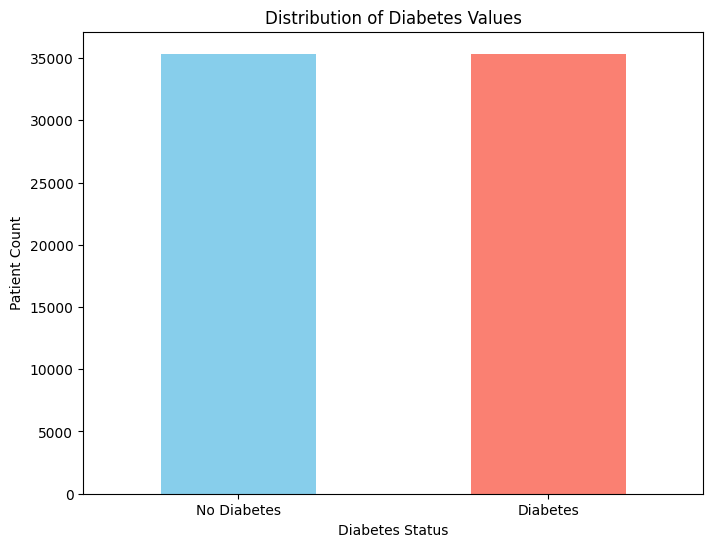

In [ ]:
# Count the occurrences of each class in the 'diabetes' column
diabetes_counts = df['Diabetes_binary'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
diabetes_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Diabetes Values')
plt.xlabel('Diabetes Status')
plt.ylabel('Patient Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

From the above graph, we can see that we have an even distribution of the two classes in the dataset.

These are the features present in the data and their respective record types:
* 'HighBP': Nominal Categorical
* 'HighChol': Nominal Categorical
* 'CholCheck': Nominal Categorical
* 'BMI': Continuous Numerical
* 'Smoker': Nominal Categorical
* 'Stroke': Nominal Categorical
* 'HeartDiseaseorAttack': Nominal Categorical
* 'PhysActivity': Nominal Categorical
* 'Fruits': Nominal Categorical
* 'Veggies': Nominal Categorical
* 'HvyAlcoholConsump': Nominal Categorical
* 'AnyHealthcare': Nominal Categorical
* 'NoDocbcCost': Nominal Categorical
* 'GenHlth': Nominal Categorical
* 'MentHlth': Discontinuios Numerical
* 'PhysHlth': Discontinuios Numerical
* 'DiffWalk': Nominal Categorical
* 'Sex': Nominal Categorical
* 'Age': Ordinal Categorical
* 'Education': Ordinal Categorical
* 'Income': Ordinal Categorical

## **Analysis of Numerical Variables**

The following are the numerical features in the data
* 'BMI': Continuous Numerical
* 'MentHlth': Discontinuios Numerical
* 'PhysHlth': Discontinuios Numerical

### Column: "BMI"

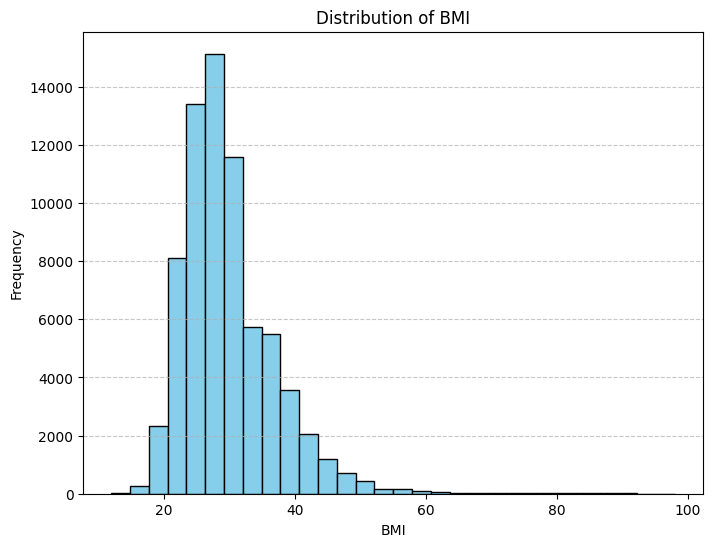

In [ ]:
# Create a histogram for the 'BMI' column
plt.figure(figsize=(8, 6))
plt.hist(df['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the above data we can see that most of the people in this dataset have BMI between 18 and 60 years old. The histogram is skewed to the right.

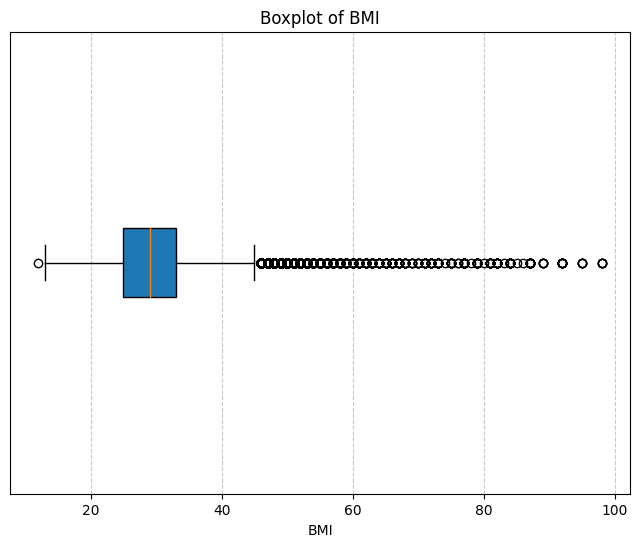

In [ ]:
# Create a boxplot for the 'BMI' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['BMI'], vert=False, patch_artist=True)
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.yticks([], [])  # Remove y-axis ticks and labels
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

From the above boxplot, we can see that majority of the population in this dataset is have BMI between 18 and 45 with outliers to the obese end of the spectrum.

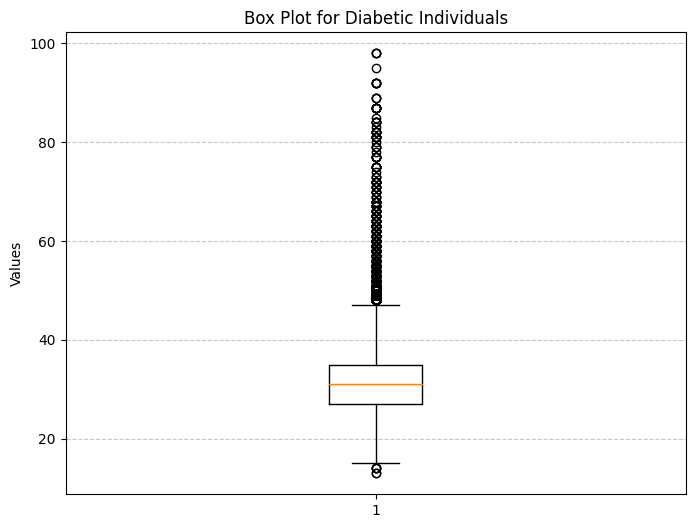

In [ ]:
# Filter the DataFrame to include only rows where 'Diabetic' column is not 0
filtered_df = df[df['Diabetes_binary'] == 1]

# Create box plot for 'Age' and 'BMI' columns based on filtered DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df['BMI'])
plt.title('Box Plot for Diabetic Individuals')
plt.ylabel('Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

When we filter with just the diabetic data, we see a similar trend as the general distribution of the BMI.

### Column: "Physical Health"

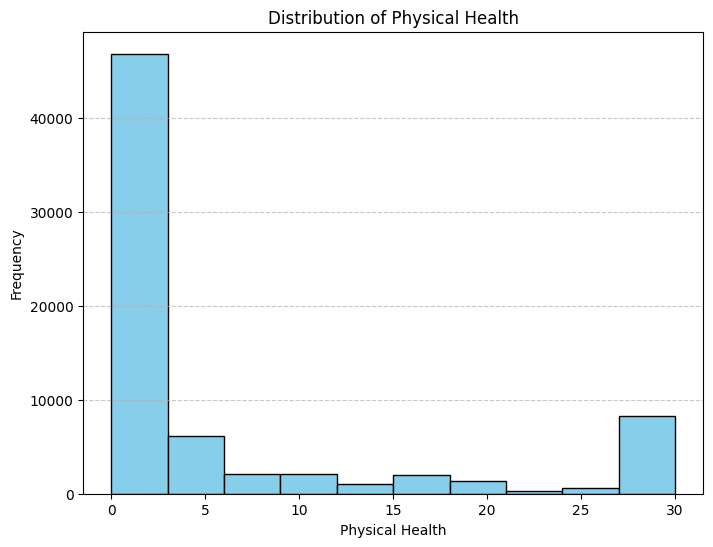

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['PhysHlth'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Physical Health')
plt.xlabel('Physical Health')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the above graph, we can see that that most of the people in the dataset are not not very physically active throughout the month.

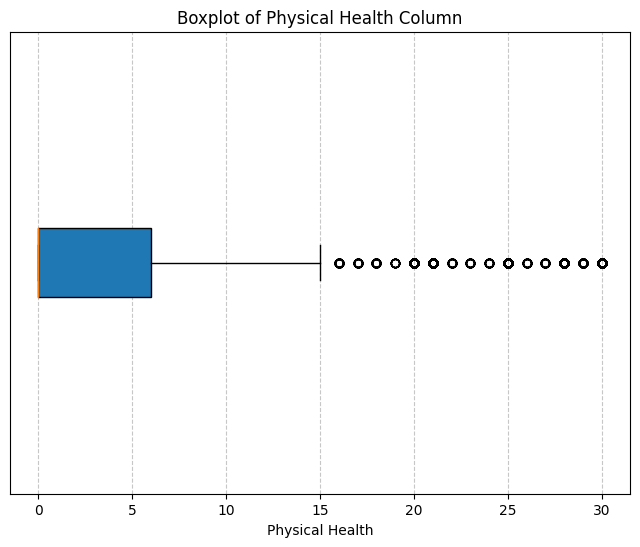

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['PhysHlth'], vert=False, patch_artist=True)
plt.title('Boxplot of Physical Health Column')
plt.xlabel('Physical Health')
plt.yticks([], [])  # Remove y-axis ticks and labels
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The boxplot above confirms the same showing most people in the dataset work anywhere between 0-5 days in a month.

### Column : "Mental Health"

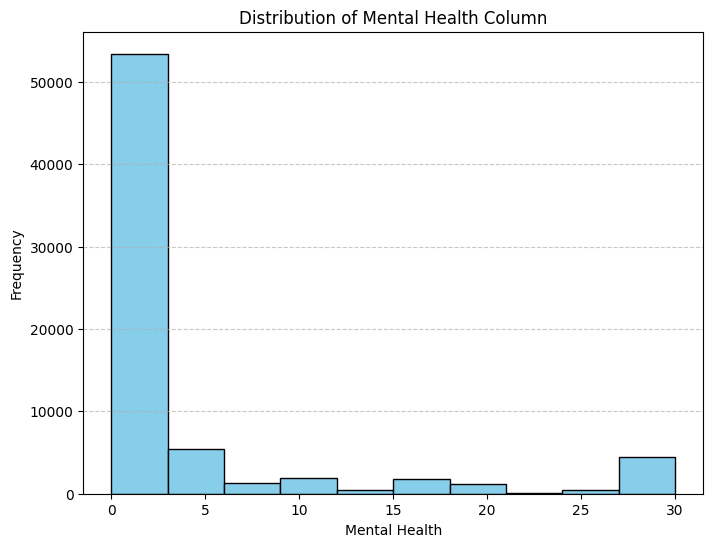

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['MentHlth'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Mental Health Column')
plt.xlabel('Mental Health')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The above plot shows that the people in this dataset have experienced stress throughout the month. The above graph is skewed to the right showing most people are mostly happy and do not have frequent mental heath issues.

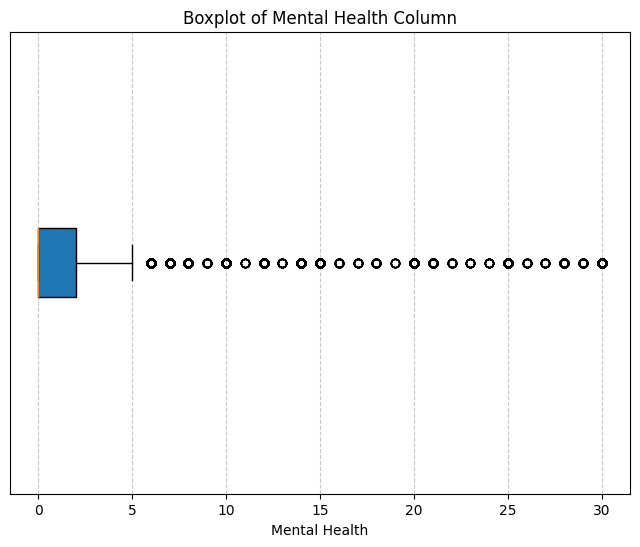

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['MentHlth'], vert=False, patch_artist=True)
plt.title('Boxplot of Mental Health Column')
plt.xlabel('Mental Health')
plt.yticks([], [])  # Remove y-axis ticks and labels
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The box plot above confirms the same observation made in the histogram. It shows a lot of the population in the dataset face about 0-5 days of stress in a month.

## **Analysis of Categorical Features**

The following are the categorical features in the data:
* 'HighBP': Nominal Categorical
* 'HighChol': Nominal Categorical
* 'CholCheck': Nominal Categorical
* 'Smoker': Nominal Categorical
* 'Stroke': Nominal Categorical
* 'HeartDiseaseorAttack': Nominal Categorical
* 'PhysActivity': Nominal Categorical
* 'Fruits': Nominal Categorical
* 'Veggies': Nominal Categorical
* 'HvyAlcoholConsump': Nominal Categorical
* 'AnyHealthcare': Nominal Categorical
* 'NoDocbcCost': Nominal Categorical
* 'GenHlth': Nominal Categorical
* 'DiffWalk': Nominal Categorical
* 'Sex': Nominal Categorical
* 'Age': Ordinal Categorical
* 'Education': Ordinal Categorical
* 'Income': Ordinal Categorical


In [ ]:
categorical_columns = {'HighBP':['No','Yes'], 'HighChol':['No','Yes'], 'CholCheck':['No','Yes'], 'Smoker':['No','Yes'],
                       'Stroke':['No','Yes'], 'HeartDiseaseorAttack':['No','Yes'], 'PhysActivity':['No','Yes'],'Fruits':['No','Yes'],'Veggies':['No','Yes'],
                       'AnyHealthcare': ['No', 'Yes'], 'NoDocbcCost': ['No', 'Yes'], 'GenHlth': ['Excellent', 'Very good', 'Good', 'Fair', 'Poor'],
                       'DiffWalk': ['No', 'Yes'],
                       'Sex': ['Male', 'Female'],
                       'Education': ['KG', 'G1-8', 'G9-11','G12/GED','C1-3','C4 or more']
}

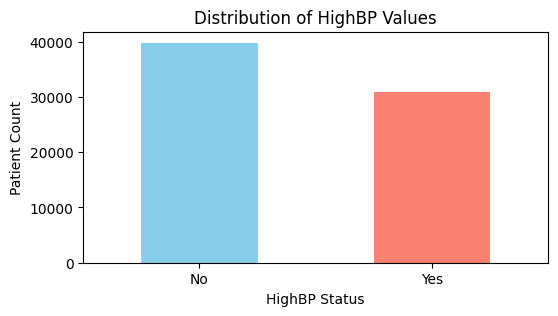

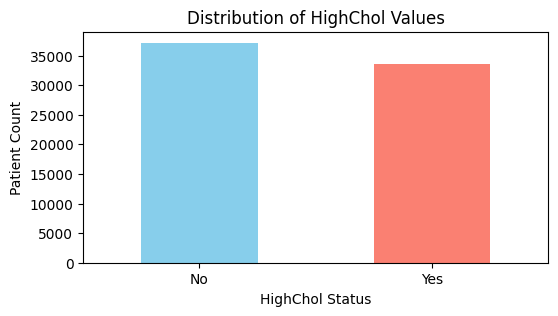

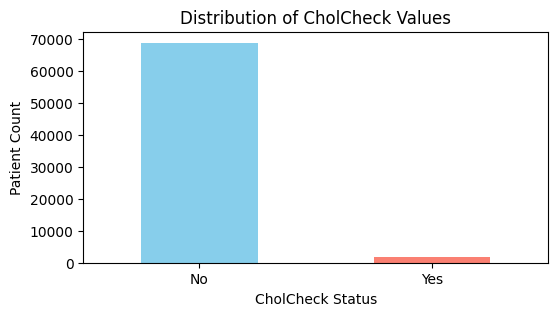

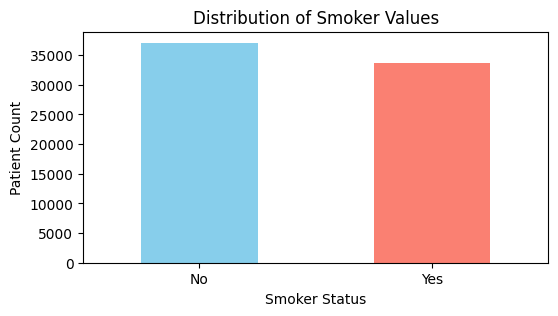

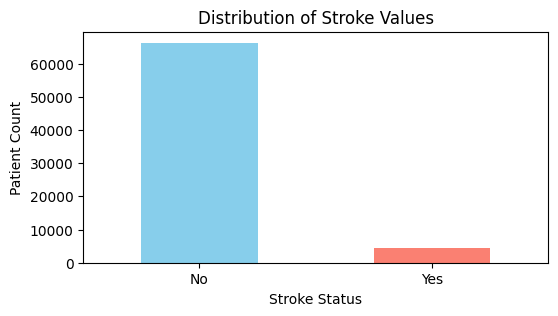

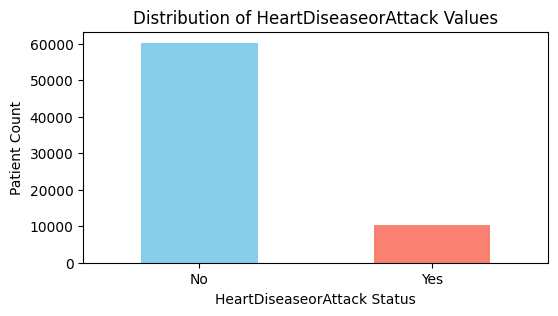

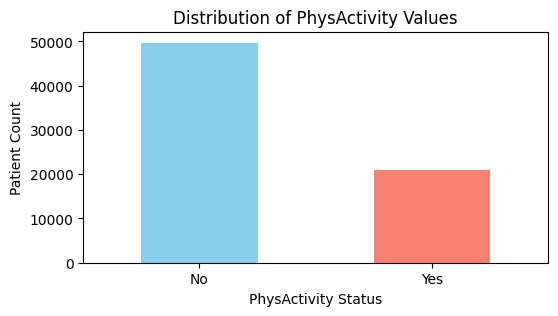

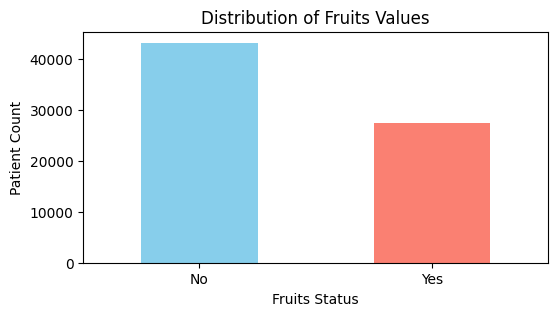

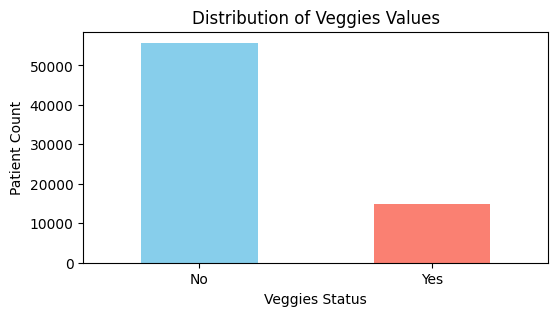

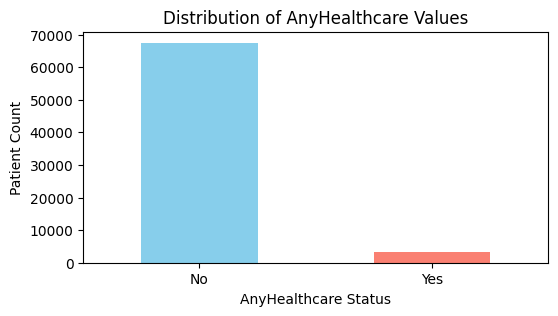

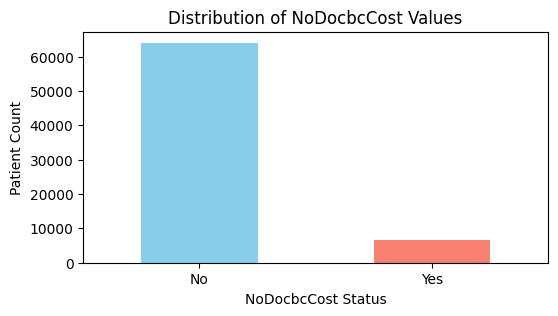

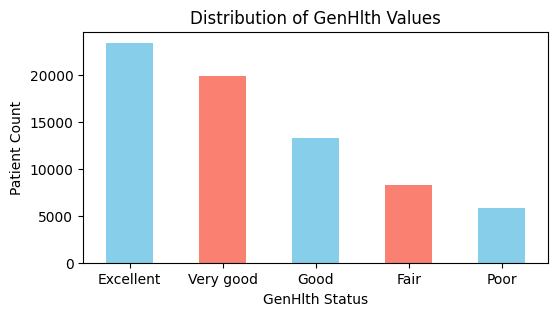

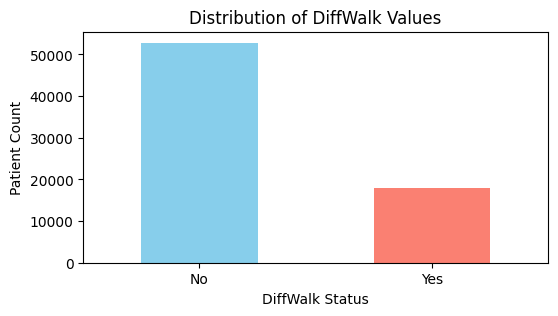

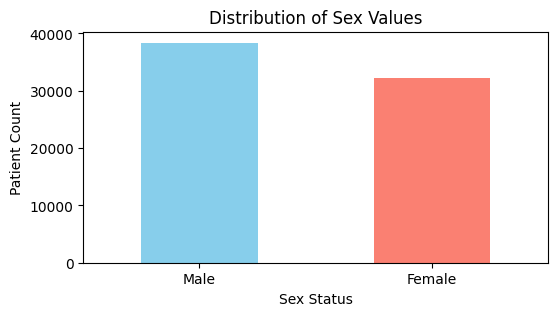

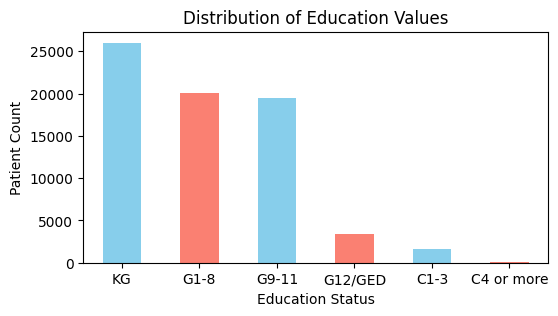

In [ ]:
# categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity','Fruits','Veggies']
# Count the occurrences of each class in the 'diabetes' column

for col in list(categorical_columns.keys()):
  col_counts = df[col].value_counts()

  # Create a bar plot
  plt.figure(figsize=(6, 3))
  col_counts.plot(kind='bar', color=['skyblue', 'salmon'])
  plt.title(f'Distribution of {col} Values')
  plt.xlabel(f'{col} Status')
  plt.ylabel('Patient Count')
  plt.xticks(ticks=range(len(categorical_columns[col])), labels=categorical_columns[col], rotation=0)
  plt.show()

The above charts show the distribution of the categorical features. We can see that some of the categories are evenly distributed where are some features are unevenly distributed categories.

-------------------------------------------------------------------
## **Correlation Matrix:**

In [ ]:
corrM = df.corr()
corrM.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878


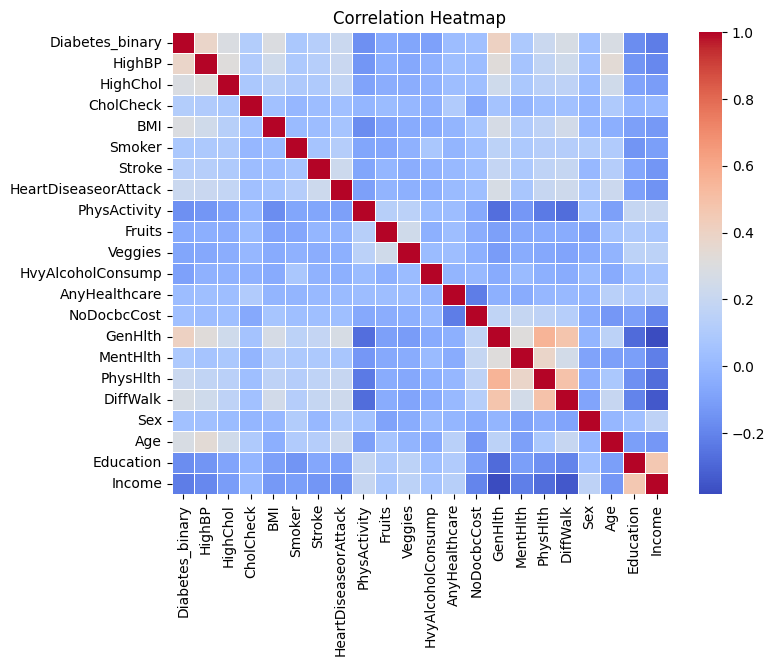

In [ ]:
# Create heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corrM, annot= False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From the above correlation matrix, we can see that HighBP, HighChol, GenHlth and BMI seem to have the most correlation with the target variable Diabetes_binary.

-------------------------------------------------------------------
## **Visualization of Numerical Data after Binning:**

In [ ]:
income_bins = [float('-inf'), 4, 7, float('inf')]
income_labels = ['< $10,000', '$10,000 - $35,000', '>$75,000']
df['IncomeGroup'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

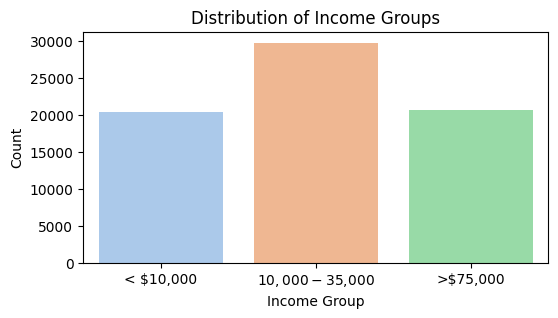

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x='IncomeGroup', data=df,hue='IncomeGroup', palette="pastel",legend = False)
plt.title('Distribution of Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()

From the visualization shown, we can see that most people in this dataset have an annual income between 10,000 and 35,000 in dollars.

In [ ]:
age_mapping = {
    1: '18-24',
    9: '60-64',
    13: '80 or older'}
df['AgeGroup'] = df['Age'].map(age_mapping)

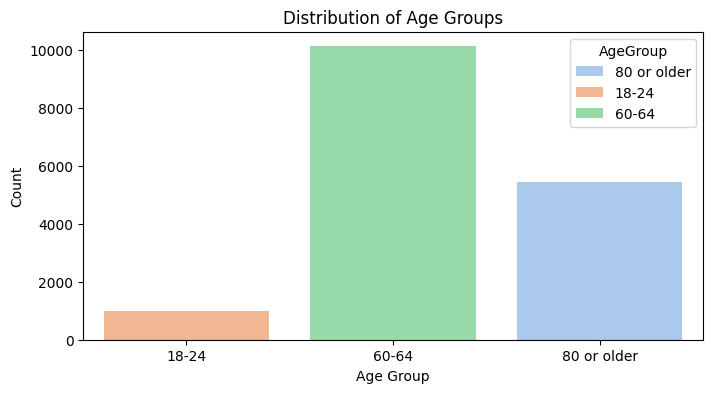

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='AgeGroup', data=df,hue= 'AgeGroup', palette="pastel", order=sorted(age_mapping.values()))
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

From the visualization shown, we can see that most people in this dataset are between the ages of 60-64.

-------------------------------------------------------------------------------
## **Checking for null values:**

In [ ]:
df.isnull().sum()

Diabetes_binary             0
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                         0
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
AnyHealthcare               0
NoDocbcCost                 0
GenHlth                     0
MentHlth                    0
PhysHlth                    0
DiffWalk                    0
Sex                         0
Age                         0
Education                   0
Income                      0
IncomeGroup                 0
AgeGroup                54175
dtype: int64

From the above, we can see that there are no missing values in this dataset.

-----------------------------------------
# **Feature Engineering**

## **Binning:**

In this section, we will be binning a few numerical variables. These variables are BMI, Physical Health and Mental Health.

In [ ]:
# Specific column name
specific_column = "Diabetes_binary"

# Find columns where correlation to specific column is 0
columns_with_zero_corr = corrM[corrM[specific_column] == 0].index.tolist()

print("Columns with correlation to", specific_column, "equal to 0:")
print(columns_with_zero_corr)

Columns with correlation to Diabetes_binary equal to 0:
[]


In [ ]:
# Define bins and labels for BMI categories
bmi_bins = [0, 18.5, 25.0, 30.0, float('inf')]
bmi_labels = ['Underweight', 'HealthyWeight', 'Overweight', 'Obese']

# Bin BMI into categories
df['BMI Category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

In [ ]:
phys_bin_edges = [0, 10, 20, 30]
# phys_labels = [0-9: 'inactive', 10-19: 'moderately active', >20: 'very active']
phys_labels = ['inactive', 'moderately active', 'active', 'very active']

# Create a new column for PhysHlth categories
df['PhysHlth_Category'] = pd.cut(df['PhysHlth'], bins=phys_bin_edges, labels=phys_labels[:-1])

In [ ]:
men_bin_edges = [0, 10, 20, 30]
men_labels = ['bad', 'average', 'good', 'very good']

# Create a new column for MentHlth categories
df['MentHlth_Category'] = pd.cut(df['MentHlth'], bins=men_bin_edges, labels=men_labels[:-1],right=False)

## **One-Hot Encoding:**

In this section, we will be encoding all the data that have been binned. The features that are being encoded are GenHlth, Income, Education, MenthHlth_Category, PhysHlth_Category, BMI_Category and Age.

In [ ]:
df = pd.get_dummies(df, columns=['GenHlth', 'Income', 'Education','MentHlth_Category', 'PhysHlth_Category','BMI Category','Age'], prefix=['GenHlth', 'Income', 'Education','MentHlth', 'PhysHlth','BMI','Age'])
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,True,False,False,False,False,False,False,False,False,False
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,True
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,True,False,False
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'IncomeGroup', 'AgeGroup', 'GenHlth_1.0',
       'GenHlth_2.0', 'GenHlth_3.0', 'GenHlth_4.0', 'GenHlth_5.0',
       'Income_1.0', 'Income_2.0', 'Income_3.0', 'Income_4.0', 'Income_5.0',
       'Income_6.0', 'Income_7.0', 'Income_8.0', 'Education_1.0',
       'Education_2.0', 'Education_3.0', 'Education_4.0', 'Education_5.0',
       'Education_6.0', 'MentHlth_bad', 'MentHlth_average', 'MentHlth_good',
       'PhysHlth_inactive', 'PhysHlth_moderately active', 'PhysHlth_active',
       'BMI_Underweight', 'BMI_HealthyWeight', 'BMI_Overweight', 'BMI_Obese',
       'Age_1.0', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 'Age_6.0',
       'Age_7.0', 'Age_8.0', 'Age_9.0', 'Age_10.0', 'Age_11.0', 'Age_12.0',
       'Age_13.0'],
      

In [ ]:
df['IncomeGroup']

0                 >$75,000
1                 >$75,000
2                 >$75,000
3                 >$75,000
4                 >$75,000
               ...        
70687            < $10,000
70688    $10,000 - $35,000
70689            < $10,000
70690            < $10,000
70691            < $10,000
Name: IncomeGroup, Length: 70692, dtype: category
Categories (3, object): ['< $10,000' < '$10,000 - $35,000' < '>$75,000']

In [ ]:
df_processed = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost','DiffWalk','Sex','GenHlth_1.0',
       'GenHlth_2.0', 'GenHlth_3.0', 'GenHlth_4.0', 'GenHlth_5.0',
       'Income_1.0', 'Income_2.0', 'Income_3.0', 'Income_4.0', 'Income_5.0',
       'Income_6.0', 'Income_7.0', 'Income_8.0', 'Education_1.0',
       'Education_2.0', 'Education_3.0', 'Education_4.0', 'Education_5.0',
       'Education_6.0', 'MentHlth_bad', 'MentHlth_average', 'MentHlth_good',
       'PhysHlth_inactive', 'PhysHlth_moderately active', 'PhysHlth_active',
       'BMI_Underweight', 'BMI_HealthyWeight', 'BMI_Overweight', 'BMI_Obese',
       'Age_1.0', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 'Age_6.0',
       'Age_7.0', 'Age_8.0', 'Age_9.0', 'Age_10.0', 'Age_11.0', 'Age_12.0',
       'Age_13.0']]

# **Dimensionality Reduction using PCA**

In this section we will be performing PCA to reduce the dimensions considered in the model.

In [ ]:
import sklearn
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
principal_components_sklearn = pca.fit_transform(df_processed)

# Display the first two principal components
print("Principal Components(Standardized) using Built in functions:")
print(pca.components_)

explained_variance = pca.explained_variance_
proportion_variance = pca.explained_variance_ratio_
cumulative_proportion = np.cumsum(proportion_variance)

print('Results using the built in function:')
# Display the results
for i in range(pca.n_components_):
    print(f"\nPrincipal Component {i + 1}:")
    print(f"Explained Variance: {explained_variance[i]}")
    print(f"Proportion Variance: {proportion_variance[i]}")
    print(f"Cumulative Proportion: {cumulative_proportion[i]}")

Principal Components(Standardized) using Built in functions:
[[ 1.69180108e-02  9.31121949e-03  1.00053149e-03  9.97356976e-01
   8.69155051e-04  8.03953964e-04  3.06433827e-03 -1.10599641e-02
  -5.83477318e-03 -3.28489921e-03 -1.65687783e-03 -3.93493144e-04
   2.72022863e-03  1.51259935e-02  5.45675420e-05 -8.59166094e-03
  -8.59562822e-03  4.97962014e-03  7.96897415e-03  4.23869487e-03
   1.69628416e-03  1.94014669e-03  1.78230093e-03  1.10236093e-03
   5.26571238e-04  3.55454677e-04 -4.88911112e-04 -6.91420751e-03
   2.52448767e-05  3.05346974e-04  1.29098371e-03  3.31239797e-03
   2.85919884e-03 -7.79317237e-03 -5.06878124e-03  1.67836846e-03
   1.04744671e-03  2.82531760e-03  2.61449030e-03  5.72371186e-03
  -2.28299158e-03 -3.02004223e-02 -1.93515806e-02  5.18349944e-02
  -1.00003063e-03 -6.85295385e-04 -4.98285621e-04 -1.00594319e-04
   5.52526550e-04  9.21451666e-04  1.47832324e-03  2.04302755e-03
   2.05971923e-03  1.64796314e-03 -5.28969511e-04 -1.64786236e-03
  -4.24197354e-

In [ ]:
pca_df = pd.DataFrame({'Explained_Variance': explained_variance, 'Proportion_Variance': proportion_variance, 'Cumulative_Proportion': cumulative_proportion})
pca_df

,Explained_Variance,Proportion_Variance,Cumulative_Proportion
0,50.875579,0.889754,0.889754
1,0.576439,0.010081,0.899835
2,0.338576,0.005921,0.905757
3,0.317689,0.005556,0.911313
4,0.307737,0.005382,0.916695
5,0.289056,0.005055,0.921750
6,0.280390,0.004904,0.926654
7,0.254166,0.004445,0.931099
8,0.237146,0.004147,0.935246
9,0.207044,0.003621,0.938867


We will be selectin the first 15 components as it captures 95% of the variance of the dataset. These components will be used in the models.

-----------------------------------------------------------------------
# **Model Training**

**Splitting the Dataset into Training, Validation and Testing Datasets**

We have split the data into training, Validataion and Testing samples in the ratio 60:20:20 respectively.

In [ ]:
from sklearn.model_selection import train_test_split
X = df_processed  # Features
y = df['Diabetes_binary']  # Target variable

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test,y_val,y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=42)

-------------------------------
## **KNN Model**

### Basic KNN Model

We will first perform KNN with the default settings and K=2.

In [ ]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

k = 2
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_pred_knn)
precision_knn = precision_score(y_val, y_pred_knn)
recall_knn = recall_score(y_val, y_pred_knn)
f1_knn = f1_score(y_val, y_pred_knn)

rmse_knn = mean_squared_error(y_val, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_val, y_pred_knn)

print(f"Root Mean Squared Error (RMSE):, {rmse_knn:.2f}")
print(f"Mean Absolute Error (MAE):, {mae_knn:.2f}")
print(f"Accuracy:, {accuracy_knn:.2f}")
print(f"Precision:, {precision_knn:.2f}")
print(f"Recall:, {recall_knn:.2f}")
print(f"F1 Score:, {f1_knn:.2f}")

Root Mean Squared Error (RMSE):, 0.59
Mean Absolute Error (MAE):, 0.35
Accuracy:, 0.65
Precision:, 0.72
Recall:, 0.48
F1 Score:, 0.58


In [ ]:
report = classification_report(y_val, y_pred_knn, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display the summary table
print("Summary Table:")
report_df

Summary Table:


,precision,recall,f1-score,support
0.0,0.617215,0.817736,0.703465,7138.000000
1.0,0.722068,0.482857,0.578718,7000.000000
accuracy,0.651931,0.651931,0.651931,0.651931
macro avg,0.669641,0.650297,0.641091,14138.000000
weighted avg,0.669130,0.651931,0.641700,14138.000000


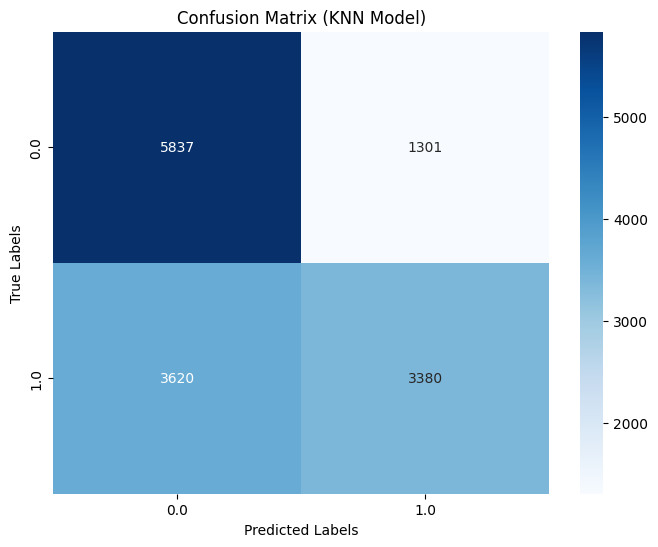

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = knn_model.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (KNN Model)')
plt.show()

From the confusion matrix, we can see TP = 3380, TN = 5837, FP = 1301 and FN = 3620. This model has a greater tendency to classify the record as non-diabetic.

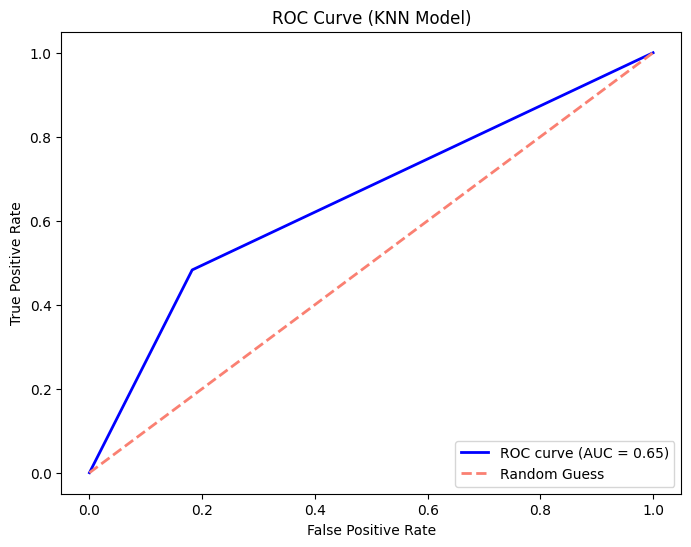

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_knn)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='salmon', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN Model)')
plt.legend(loc='lower right')
plt.show()

From the ROC curve above, we can see that the AUC is 0.65. This indicates that the model has some discriminative power in distinguishing between the positive and negative classes. But there is some room to improve the model.

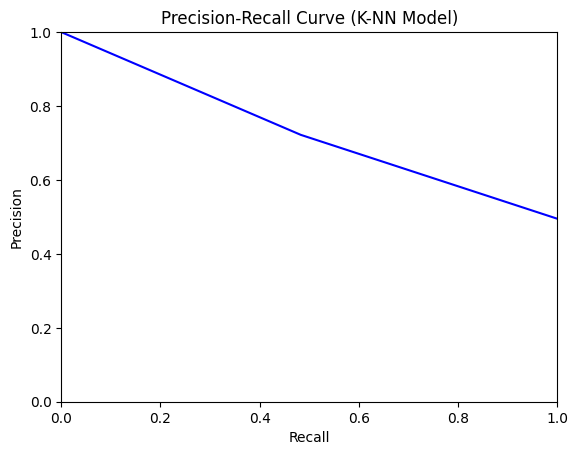

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_knn)
plt.plot(recall, precision, 'b')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (K-NN Model)')
plt.show()

A curve that is closer to the top-right corner and encompasses more area indicates better model performance. Since this is towards the top right corner, we can say that the model has better discriminative power in separating positive and negative instances.

### Model After Hyperparameter Tuning

In order to improve the performance, we will first find the optimal K value.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

mse_values = []
k_values = range(1, 101, 5)

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    mse_values.append(mse)

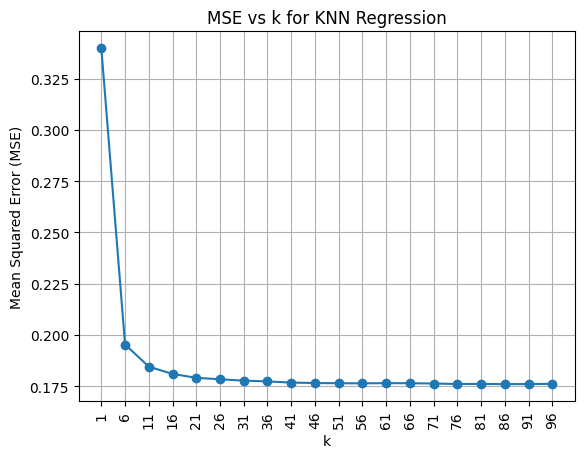

In [ ]:
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs k for KNN Regression')
plt.xticks(k_values,rotation=90)
plt.grid(True)
plt.show()

In [ ]:
best_k = k_values[np.argmin(mse_values)]
print("Best k value based on lowest MSE:", best_k)

Best k value based on lowest MSE: 86


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_pred_knn)
precision_knn = precision_score(y_val, y_pred_knn)
recall_knn = recall_score(y_val, y_pred_knn)
f1_knn = f1_score(y_val, y_pred_knn)

rmse_knn = mean_squared_error(y_val, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_val, y_pred_knn)

print(f"Root Mean Squared Error (RMSE):, {rmse_knn:.2f}")
print(f"Mean Absolute Error (MAE):, {mae_knn:.2f}")
print(f"Accuracy:, {accuracy_knn:.2f}")
print(f"Precision:, {precision_knn:.2f}")
print(f"Recall:, {recall_knn:.2f}")
print(f"F1 Score:, {f1_knn:.2f}")

Root Mean Squared Error (RMSE):, 0.51
Mean Absolute Error (MAE):, 0.26
Accuracy:, 0.74
Precision:, 0.73
Recall:, 0.75
F1 Score:, 0.74


We will use grid search to find the best possible distance metrics, weights and leaf_size with the lowest K value we have already found.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [86],
    'weights': ['uniform', 'distance'],  # Weighting options
    'metric': ['euclidean', 'manhattan'],  # Distance metrics
    'leaf_size' : list(range(1,10)) # Leaf Size
}

# Define the grid search with cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with best hyperparameters on the validation set
best_model = grid_search.best_estimator_
y_pred_knn = best_model.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_pred_knn)
precision_knn = precision_score(y_val, y_pred_knn)
recall_knn = recall_score(y_val, y_pred_knn)
f1_knn = f1_score(y_val, y_pred_knn)

rmse_knn = mean_squared_error(y_val, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_val, y_pred_knn)

print(f"Root Mean Squared Error (RMSE):, {rmse_knn:.2f}")
print(f"Mean Absolute Error (MAE):, {mae_knn:.2f}")
print(f"Accuracy:, {accuracy_knn:.2f}")
print(f"Precision:, {precision_knn:.2f}")
print(f"Recall:, {recall_knn:.2f}")
print(f"F1 Score:, {f1_knn:.2f}")

Best Hyperparameters: {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 86, 'weights': 'uniform'}
Root Mean Squared Error (RMSE):, 0.51
Mean Absolute Error (MAE):, 0.26
Accuracy:, 0.74
Precision:, 0.73
Recall:, 0.76
F1 Score:, 0.74


We can see that we obtained a accuracy of 0.74 with the best hyperparameters obtained from grid search which improved our accuracy by 0.09 from the basic KNN Model.

In [ ]:
report = classification_report(y_val, y_pred_knn, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display the summary table
print("Summary Table:")
report_df

Summary Table:


,precision,recall,f1-score,support
0.0,0.754508,0.726814,0.740402,7138.000000
1.0,0.731479,0.758857,0.744917,7000.000000
accuracy,0.742679,0.742679,0.742679,0.742679
macro avg,0.742994,0.742836,0.742660,14138.000000
weighted avg,0.743106,0.742679,0.742637,14138.000000


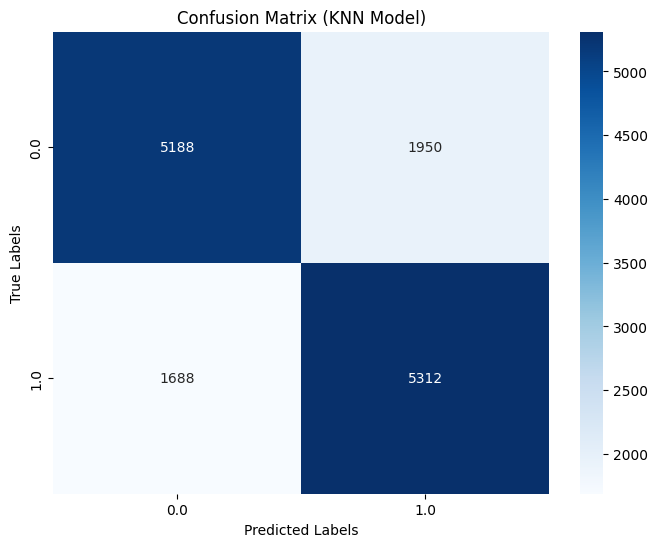

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (KNN Model)')
plt.show()

From the confusion matrix, we can see TP = 5312, TN = 5188, FP = 1950 and FN = 1688. We can see that this model can better classify the diabetic patients than the basic model.

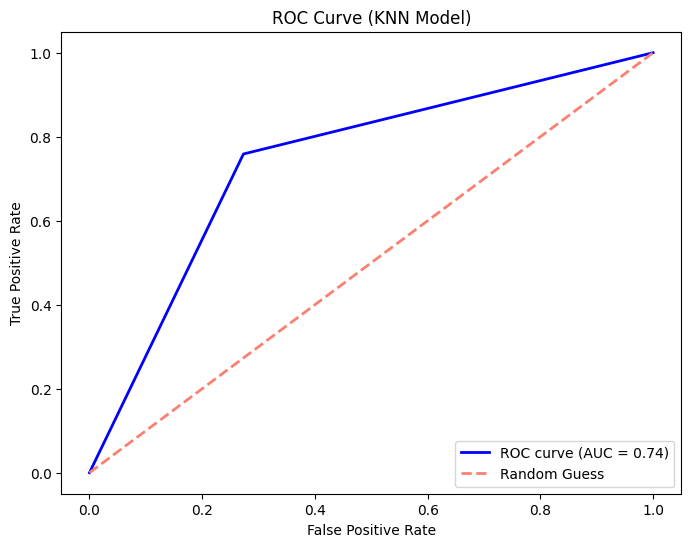

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_knn)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='salmon', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN Model)')
plt.legend(loc='lower right')
plt.show()

From the ROC curve above, we can see that the AUC is 0.74. This indicates that the model has good discriminative power in distinguishing between the positive and negative classes.

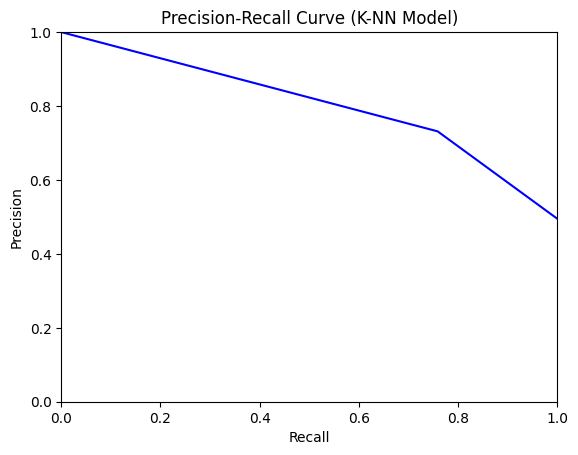

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_knn)
plt.plot(recall, precision, 'b')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (K-NN Model)')
plt.show()

A curve that is closer to the top-right corner and encompasses more area indicates better model performance. Since this is higher than the previous basic model's PR Curve, we can say that the model has better discriminative power in separating positive and negative instances than the basic KNN model.

------------------------------
## **Decion Tree Model**

We make a decision tree model in this section.

In [ ]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_val)

accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)

rmse_dt = mean_squared_error(y_val, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_val, y_pred_dt)

print(f"Root Mean Squared Error (RMSE):, {rmse_dt:.2f}")
print(f"Mean Absolute Error (MAE):, {mae_dt:.2f}")
print(f"Accuracy:, {accuracy_dt:.2f}")
print(f"Precision:, {precision_dt:.2f}")
print(f"Recall:, {recall_dt:.2f}")
print(f"F1 Score:, {f1_dt:.2f}")

Root Mean Squared Error (RMSE):, 0.59
Mean Absolute Error (MAE):, 0.35
Accuracy:, 0.65
Precision:, 0.65
Recall:, 0.64
F1 Score:, 0.65


We can see that it gives an accuracy of 0.65.

In [ ]:
report_dt = classification_report(y_val, y_pred_dt, output_dict=True)
report_df_dt = pd.DataFrame(report_dt).transpose()
report_df_dt

,precision,recall,f1-score,support
0.0,0.653664,0.657327,0.655490,7138.000000
1.0,0.648563,0.644857,0.646705,7000.000000
accuracy,0.651153,0.651153,0.651153,0.651153
macro avg,0.651114,0.651092,0.651098,14138.000000
weighted avg,0.651138,0.651153,0.651140,14138.000000


The above is the Summary Report of the model

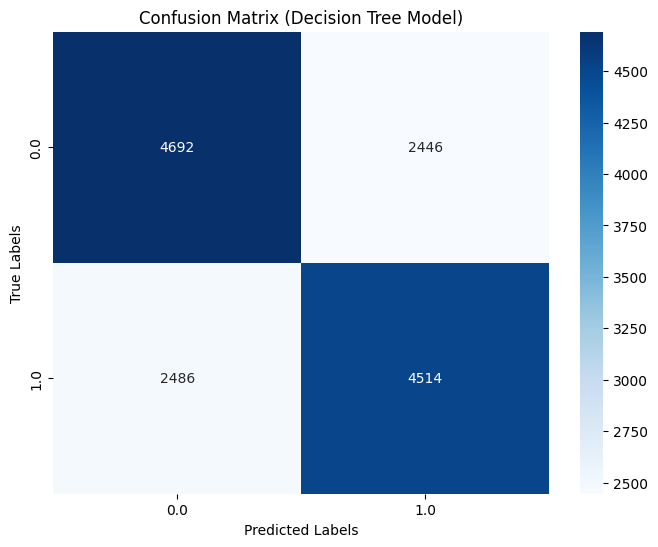

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_val, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Decision Tree Model)')
plt.show()

From the confusion matrix, we can see TP = 4514, TN = 4692, FP = 2446 and FN = 2486.

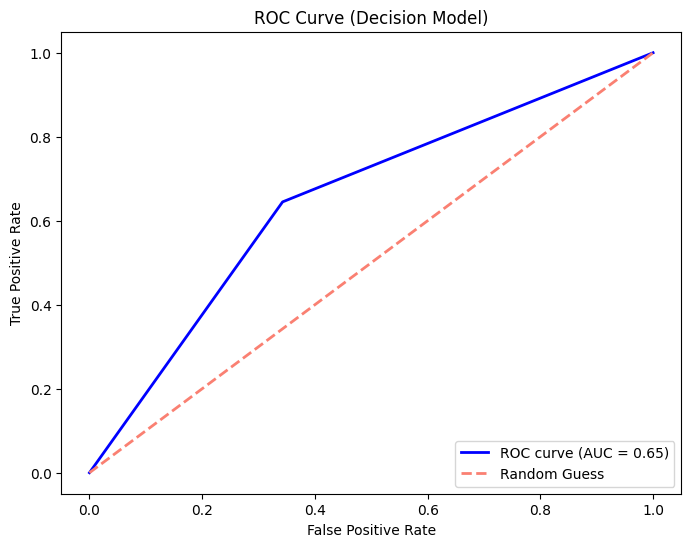

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, y_pred_dt)
roc_auc_dt = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='salmon', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Model)')
plt.legend(loc='lower right')
plt.show()

From the ROC curve above, we can see that the AUC is 0.65. This indicates that the model has some discriminative power in distinguishing between the positive and negative classes.

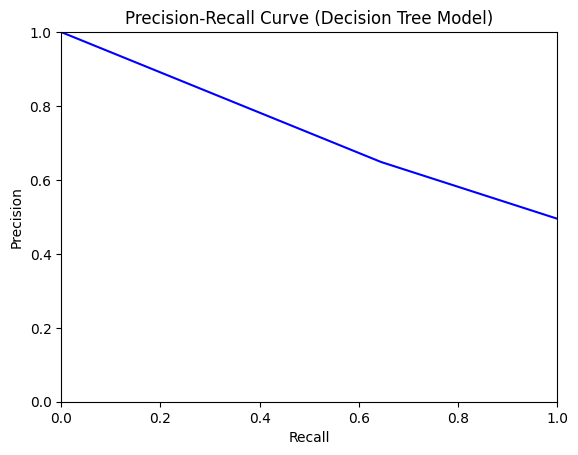

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_dt)
plt.plot(recall, precision, 'b')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Decision Tree Model)')
plt.show()

A curve that is closer to the top-right corner and encompasses more area indicates better model performance. Since this is towards the top right corner, we can say that the model has better discriminative power in separating positive and negative instances.

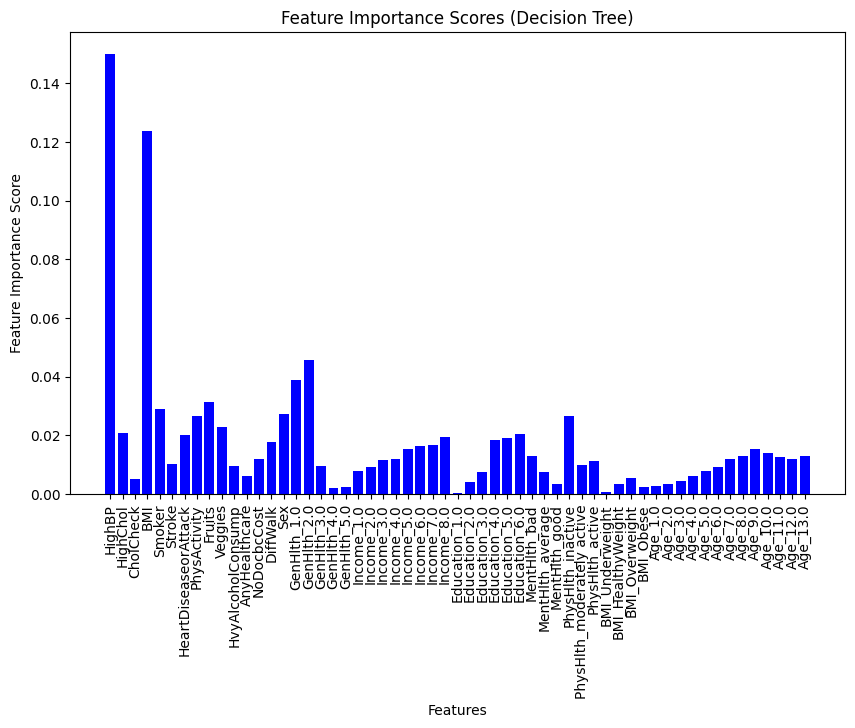

In [ ]:
feature_importances = dt_model.feature_importances_
features =  X_train.columns # Replace with your actual feature names

# Create a bar plot to visualize feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color='blue')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance Scores (Decision Tree)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

From the above, we can say that the most important factors affecting the model are BMI and High BP.

--------------------------------------------------------------
## **Random Forest Model**

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_rf = rf_model.predict(X_val)

accuracy_rf = accuracy_score(y_val, y_pred_rf)
rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

print(f"Root Mean Squared Error (RMSE):, {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE):, {mae_rf:.2f}")
print(f"Accuracy:, {accuracy_rf:.2f}")
print(f"Precision:, {precision_rf:.2f}")
print(f"Recall:, {recall_rf:.2f}")
print(f"F1 Score:, {f1_rf:.2f}")

Root Mean Squared Error (RMSE):, 0.52
Mean Absolute Error (MAE):, 0.27
Accuracy:, 0.73
Precision:, 0.71
Recall:, 0.77
F1 Score:, 0.74


In [ ]:
report_rf = classification_report(y_val, y_pred_rf, output_dict=True)
report_df_rf = pd.DataFrame(report_rf).transpose()
report_df_rf

,precision,recall,f1-score,support
0.0,0.758163,0.696133,0.725825,7138.000000
1.0,0.714003,0.773571,0.742595,7000.000000
accuracy,0.734474,0.734474,0.734474,0.734474
macro avg,0.736083,0.734852,0.734210,14138.000000
weighted avg,0.736299,0.734474,0.734128,14138.000000


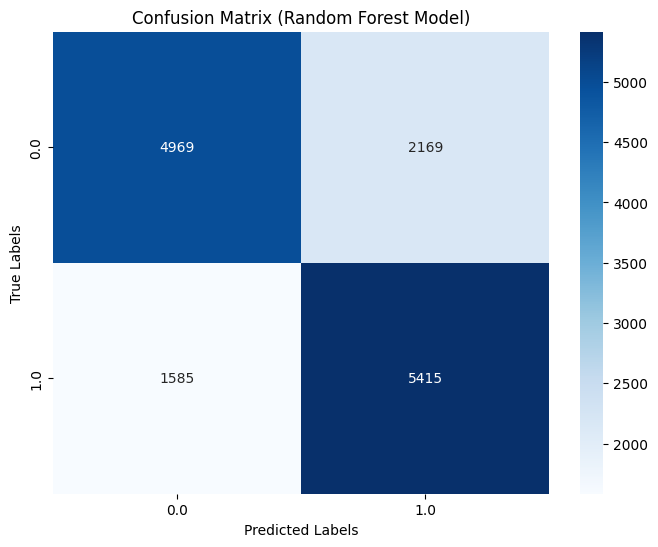

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Random Forest Model)')
plt.show()

From the confusion matrix, we can see TP = 5415, TN = 4969, FP = 2169 and FN = 1585.

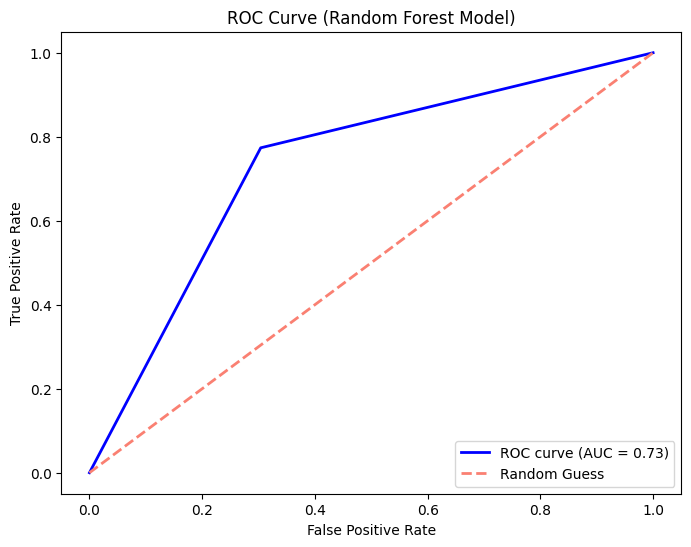

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, y_pred_rf)
roc_auc_rf = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='salmon', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest Model)')
plt.legend(loc='lower right')
plt.show()

From the ROC curve above, we can see that the AUC is 0.73. This indicates that the model has a good discriminative power in distinguishing between the positive and negative classes.

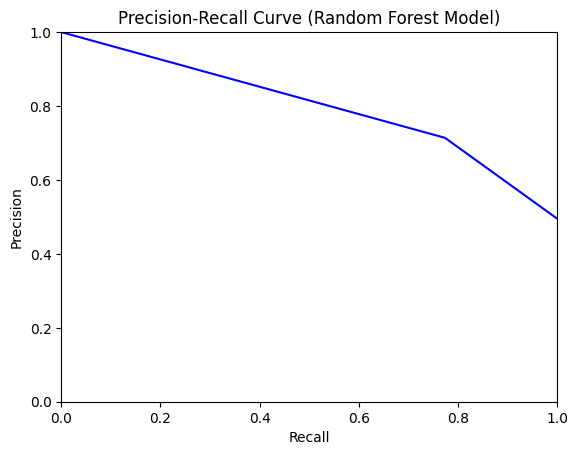

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_rf)
plt.plot(recall, precision, 'b')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest Model)')
plt.show()

A curve that is closer to the top-right corner and encompasses more area indicates better model performance. Since this is towards the top right corner, we can say that the model has better discriminative power in separating positive and negative instances.

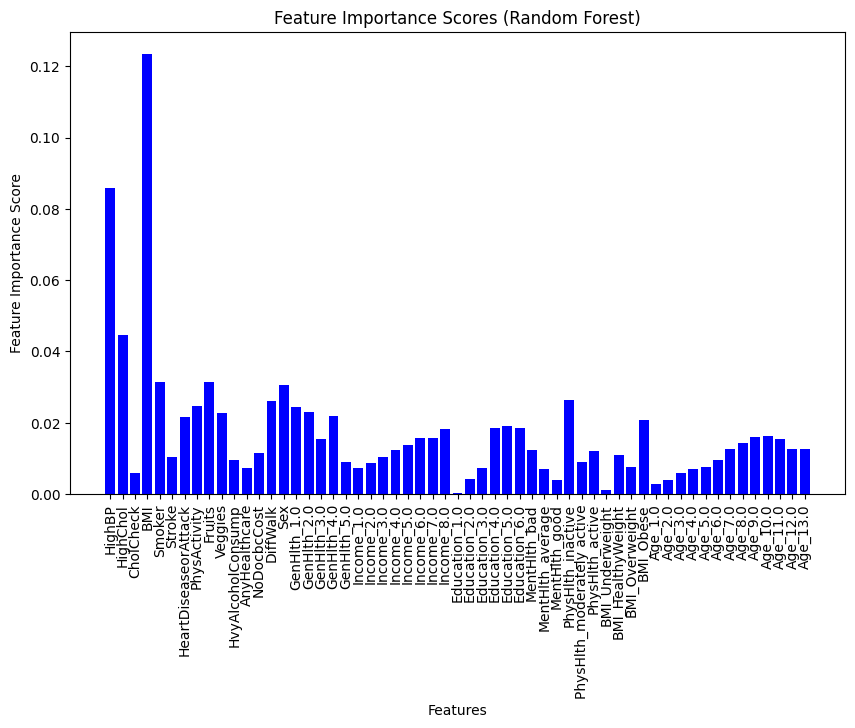

In [ ]:
feature_importances = rf_model.feature_importances_
features =  X_train.columns # Replace with your actual feature names

# Create a bar plot to visualize feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color='blue')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance Scores (Random Forest)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

From the above, we can say that the most important factors affecting the model are BMI, High BP and High Chol.

-------------------------------------------------------------
# **Model Performance Comparision**

## Comparing Validation Dataset performance metrics:

In this section, we will compare the accuracy scores we have achieved using the validation set during the model development process.

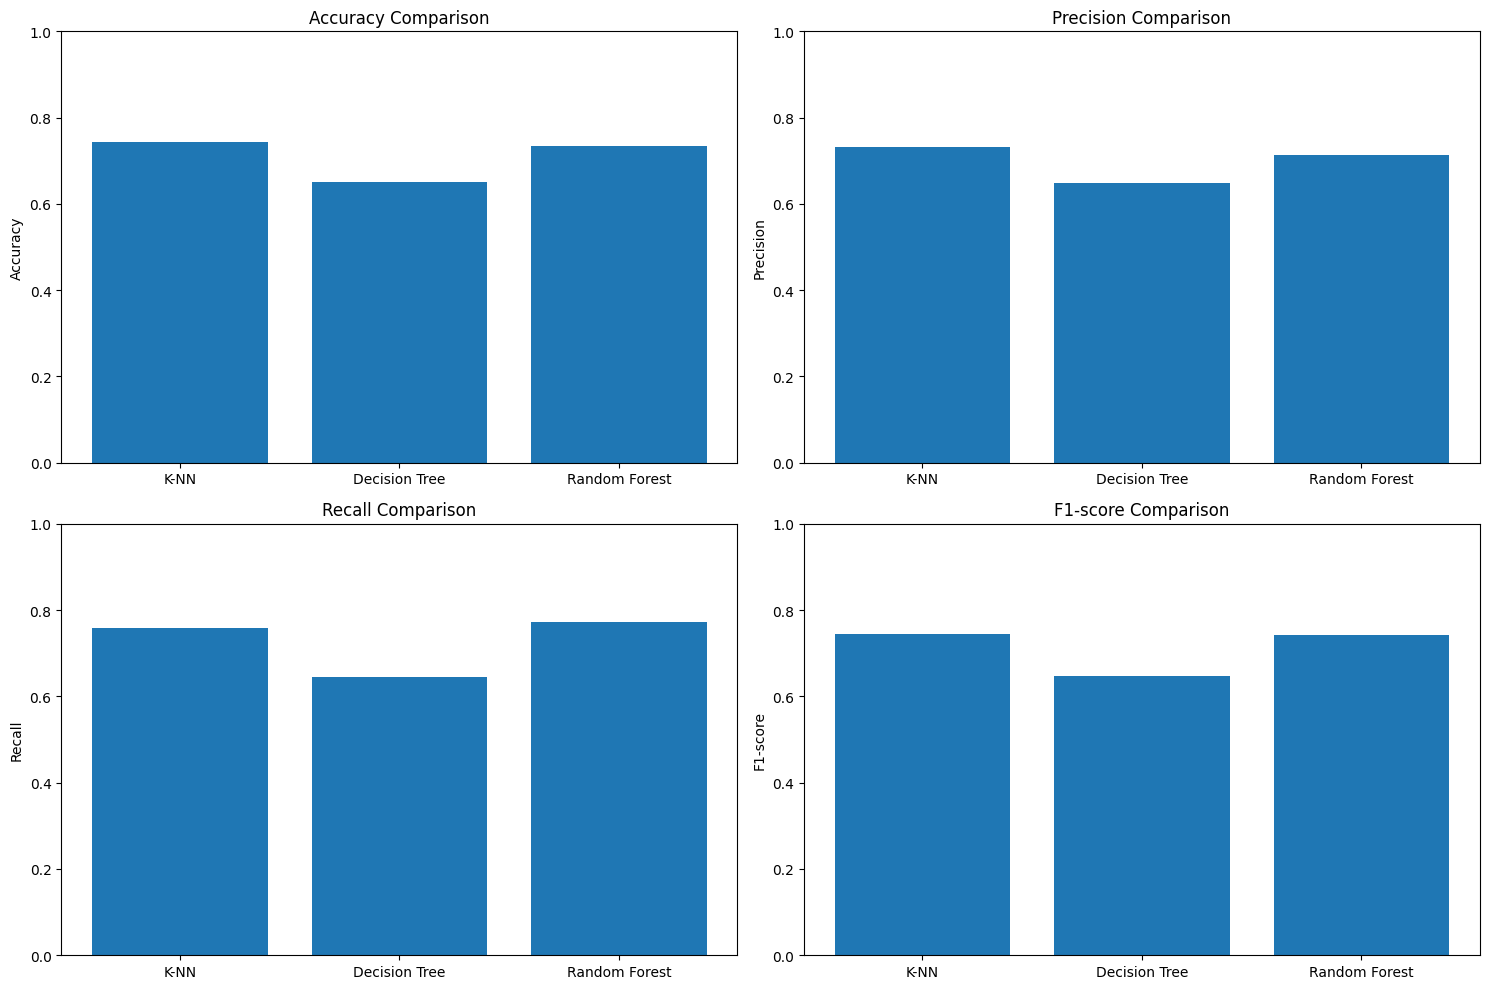

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn]
dt_scores = [accuracy_dt, precision_dt, recall_dt, f1_dt]
rf_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf]

# Create a bar plot for each metric
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    axs[row, col].bar(['K-NN', 'Decision Tree', 'Random Forest'], [knn_scores[i], dt_scores[i], rf_scores[i]])
    axs[row, col].set_ylabel(metric)
    axs[row, col].set_title(f'{metric} Comparison')
    axs[row, col].set_ylim(0, 1)  # Set the y-axis limit to 0-1 for better visualization

plt.tight_layout()
plt.show()

In [ ]:
# Create DataFrame
df_comparision = pd.DataFrame({
    'Metrics': metrics,
    'KNN Model': knn_scores,
    'Decision Tree Model': dt_scores,
    'Random Forest Model': rf_scores
})

# Set 'Metrics' column as index
df_comparision.set_index('Metrics', inplace=True)

# Display DataFrame
df_comparision

           KNN Model  Decision Tree Model  Random Forest Model
Metrics                                                       
Accuracy    0.742679             0.651153             0.734474
Precision   0.731479             0.648563             0.714003
Recall      0.758857             0.644857             0.773571
F1-score    0.744917             0.646705             0.742595


From the above, we can observe that the KNN model generally performs better than the Decision Tree and Random Forest models in terms of accuracy, precision, recall, and F1-score. The Random Forest model also shows competitive performance, particularly in terms of recall.

## Comparing Test Dataset Performance Metrics:

In this section, we will be using a holdout that hasnt been used in the data training or validation phase to select the best performing model of the three.

In [ ]:
best_model = grid_search.best_estimator_
y_pred_knn_1 = best_model.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_1)
precision_knn_test = precision_score(y_test, y_pred_knn_1)
recall_knn_test = recall_score(y_test, y_pred_knn_1)
f1_knn_test = f1_score(y_test, y_pred_knn_1)

In [ ]:
y_pred_dt_1 = dt_model.predict(X_test)

accuracy_dt_test = accuracy_score(y_test, y_pred_dt_1)
precision_dt_test = precision_score(y_test, y_pred_dt_1)
recall_dt_test = recall_score(y_test, y_pred_dt_1)
f1_dt_test = f1_score(y_test, y_pred_dt_1)

In [ ]:
y_pred_rf_1 = rf_model.predict(X_test)

accuracy_rf_test = accuracy_score(y_test, y_pred_rf_1)
precision_rf_test = precision_score(y_test, y_pred_rf_1)
recall_rf_test = recall_score(y_test, y_pred_rf_1)
f1_rf_test = f1_score(y_test, y_pred_rf_1)

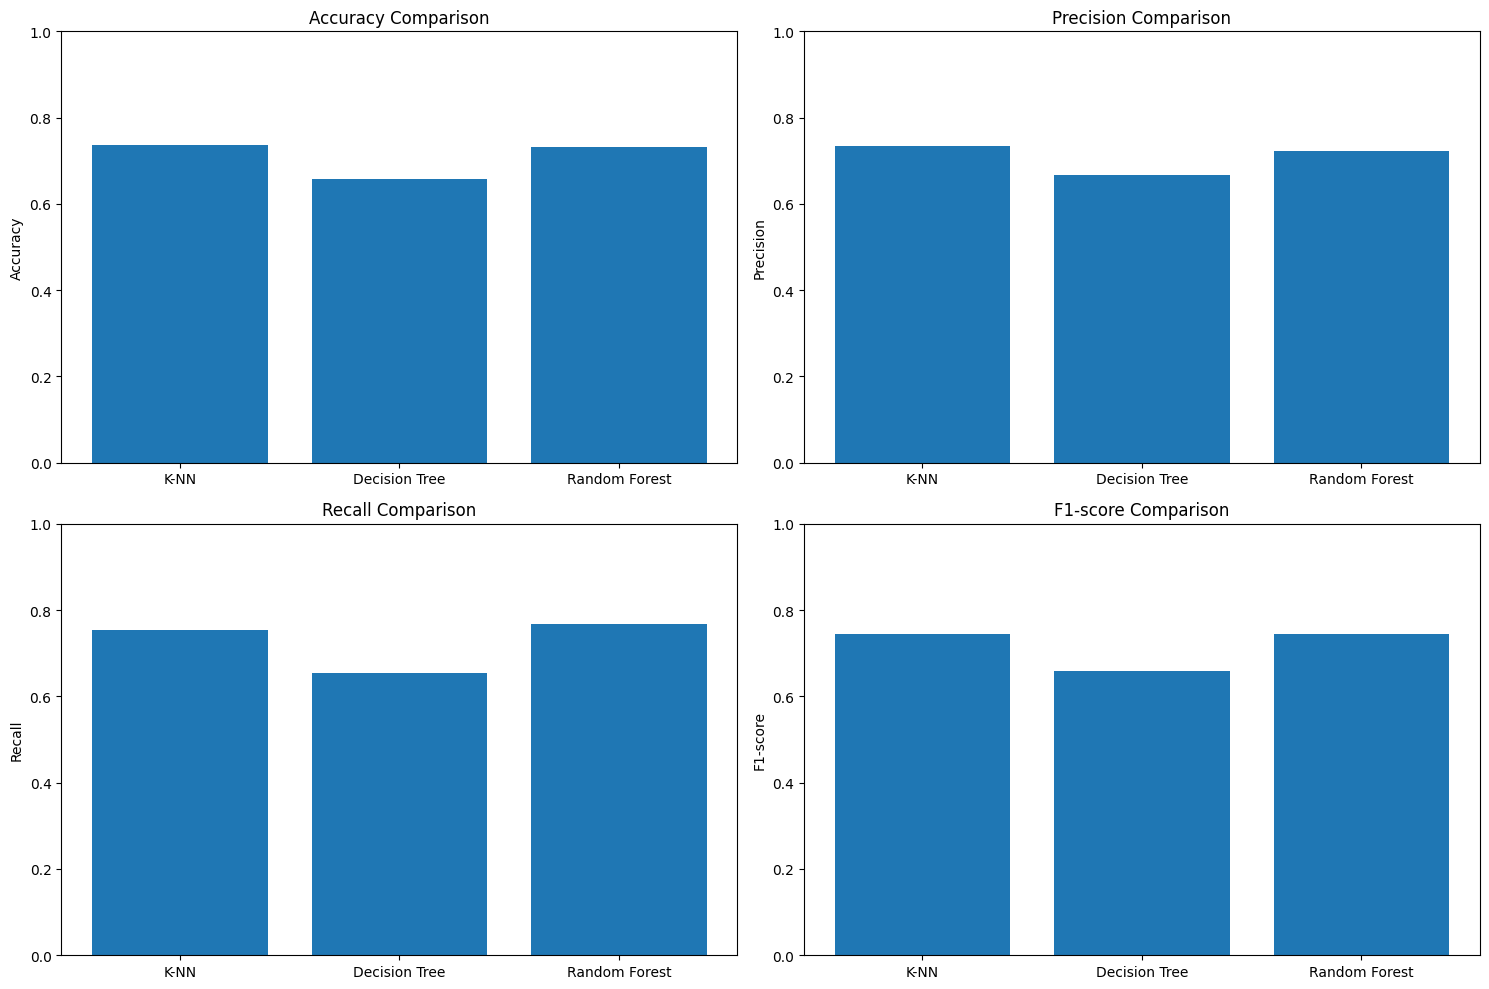

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
knn_scores_test = [accuracy_knn_test, precision_knn_test, recall_knn_test, f1_knn_test]
dt_scores_test = [accuracy_dt_test, precision_dt_test, recall_dt_test, f1_dt_test]
rf_scores_test = [accuracy_rf_test, precision_rf_test, recall_rf_test, f1_rf_test]

# Create a bar plot for each metric
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    axs[row, col].bar(['K-NN', 'Decision Tree', 'Random Forest'], [knn_scores[i], dt_scores[i], rf_scores[i]])
    axs[row, col].set_ylabel(metric)
    axs[row, col].set_title(f'{metric} Comparison')
    axs[row, col].set_ylim(0, 1)  # Set the y-axis limit to 0-1 for better visualization

plt.tight_layout()
plt.show()

In [ ]:
# Create DataFrame
df_comparision_test = pd.DataFrame({
    'Metrics': metrics,
    'KNN Model': knn_scores_test,
    'Decision Tree Model': dt_scores_test,
    'Random Forest Model': rf_scores_test
})

# Set 'Metrics' column as index
df_comparision_test.set_index('Metrics', inplace=True)

# Display DataFrame
df_comparision_test

           KNN Model  Decision Tree Model  Random Forest Model
Metrics                                                       
Accuracy    0.737393             0.658745             0.732301
Precision   0.734794             0.666429             0.721981
Recall      0.753769             0.653685             0.767030
F1-score    0.744160             0.659996             0.743824


From the above, we can say that the KNN and Random Forest models generally perform better than the Decision Tree model across the multiple evaluation criteria. We can see that when new data is tried, Random Forest has a comparable performance in terms of recall with KNN as opposed to what we observed with the validation dataset.